In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ann-q3/movies.csv
/kaggle/input/ann-q3/ratings.csv


In [2]:
df_movie = pd.read_csv('../input/ann-q3/movies.csv')
df_movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
df_rating = pd.read_csv('../input/ann-q3/ratings.csv')
df_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
print('shape of movies dataset:',df_movie.shape)
print('shape of ratings dataset:',df_rating.shape)

shape of movies dataset: (9742, 3)
shape of ratings dataset: (100836, 4)


In [5]:
df_movie['List Index'] = df_movie.index

In [6]:
df_movie

,movieId,title,genres,List Index
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,4
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,9737
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,9738
9739,193585,Flint (2017),Drama,9739
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,9740


## B.

In [7]:
df = pd.merge(df_movie,df_rating,on = 'movieId')
df

,movieId,title,genres,List Index,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,17,4.5,1305696483
...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,9737,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,9738,184,3.5,1537109545
100833,193585,Flint (2017),Drama,9739,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,9740,184,3.5,1537110021


## C.

In [8]:
df = df.drop(['title','genres','timestamp'], axis=1)
df

,movieId,List Index,userId,rating
0,1,0,1,4.0
1,1,0,5,4.0
2,1,0,7,4.5
3,1,0,15,2.5
4,1,0,17,4.5
...,...,...,...,...
100831,193581,9737,184,4.0
100832,193583,9738,184,3.5
100833,193585,9739,184,3.5
100834,193587,9740,184,3.5


## D.

In [9]:
Group_df = df.groupby('userId')
Group_df.first()

,movieId,List Index,rating
userId,,,
1,1,0,4.0
2,318,277,3.0
3,31,30,0.5
4,21,20,3.0
5,1,0,4.0
...,...,...,...
606,1,0,2.5
607,1,0,4.0
608,1,0,2.5


## E.

In [10]:
UsedUsers = 1000
#create list
train_X = []
#for each user in the group
for i, user in Group_df:
    #Temp variable that stores every movie's rating
    normal_rating = [0]*len(df_movie)
    #For Each movie in the curUser's movie list
    for j, movie in user.iterrows():
        #Divide ratings by 5 and store it
        normal_rating[int(movie['List Index'])] = movie['rating']/5.0
    
    #Now add the list of ratings into the training list
    train_X.append(normal_rating)
    #Check to see if we finished adding in the amount of users for training
    if UsedUsers == 0:
        break
    UsedUsers -= 1
    

In [11]:
train_X[0][:6]


[0.8, 0, 0.8, 0, 0, 0.8]

In [12]:
df[df['userId'] == 1]

,movieId,List Index,userId,rating
0,1,0,1,4.0
325,3,2,1,4.0
433,6,5,1,4.0
2107,47,43,1,5.0
2379,50,46,1,5.0
...,...,...,...,...
56816,3744,2802,1,4.0
57276,3793,2836,1,5.0
57457,3809,2847,1,4.0
59170,4006,2991,1,4.0


## F and G.

In [13]:
class RBM:
    def __init__(self,n_hid, n_vis,alpha,batchsize,epochs):
        self.n_vis = n_vis
        self.n_hid = n_hid
        self.alpha = alpha
        self.batchsize = batchsize
        self.epochs = epochs
        self.errors = []
        self.sess = tf.Session()

    def train(self,train_X,inputUser):
        
        #Paramters
        br = tf.placeholder("float", [self.n_vis]) 
        ba = tf.placeholder("float", [self.n_hid])
        W = tf.placeholder("float", [self.n_vis, self.n_hid])
        #forward
        v0 = tf.placeholder("float", [None, self.n_vis])
        _h0 = tf.nn.sigmoid(tf.matmul(v0, W) + ba)
        h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))

        _v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + br)
        v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
        h1 = tf.nn.sigmoid(tf.matmul(v1, W) + ba)
        
        w_forth = tf.matmul(tf.transpose(v0), h0)
        w_back = tf.matmul(tf.transpose(v1), h1)

        diff = (w_forth - w_back) / tf.to_float(tf.shape(v0)[0])

        #Update the parameters
        update_w = W + self.alpha * diff
        update_br = br + self.alpha * tf.reduce_mean(v0 - v1, 0)
        update_ba = ba + self.alpha * tf.reduce_mean(h0 - h1, 0)
        #MSE
        e = v0 - v1
        cal_error = tf.reduce_mean(e*e)
        #initialze variables
        w_t1 = np.zeros([self.n_vis, self.n_hid], np.float32)
        br_t1 = np.zeros([self.n_vis], np.float32)
        ba_t1 = np.zeros([self.n_hid], np.float32)
        
        w_t0 = np.zeros([self.n_vis, self.n_hid], np.float32)
        br_t0 = np.zeros([self.n_vis], np.float32)
        ba_t0 = np.zeros([self.n_hid], np.float32)
        sess = tf.Session()
        sess.run(tf.global_variables_initializer())
        #Part G
        for i in range(self.epochs):
            for start, end in zip( range(0, len(train_X), self.batchsize), range(self.batchsize, len(train_X), self.batchsize)):
                batch = train_X[start:end]
                w_t1 = sess.run(update_w, feed_dict={v0: batch, W: w_t0, br: br_t0, ba: ba_t0})
                br_t1 = sess.run(update_br, feed_dict={v0: batch, W: w_t0, br: br_t0, ba: ba_t0})
                ba_t1 = sess.run(update_ba, feed_dict={v0: batch, W: w_t0, br: br_t0, ba: ba_t0})
                w_t0 = w_t1
                br_t0 = br_t1
                ba_t0 = ba_t1
            self.errors.append(sess.run(cal_error, feed_dict={v0: train_X, W: w_t1, br: br_t1, ba: ba_t1}))
            print ('epoch %i \ %i --> %f' %(i+1, self.epochs,self.errors[-1]))
        return v0,w_t0,br_t0,ba_t0,W,br,ba
        
    def recommender(self,inputUser,v0,w_t0,br_t0,ba_t0,W,br,ba):
        z0 = tf.nn.sigmoid(tf.matmul(v0, W) + ba)
        z1 = tf.nn.sigmoid(tf.matmul(z0, tf.transpose(W)) + br)
        forward = self.sess.run(z0, feed_dict={ v0: inputUser, W: w_t0, ba: ba_t0})
        backward = self.sess.run(z1, feed_dict={ z0: forward, W: w_t0, br: br_t0})
        scores_pred = df_movie
        scores_pred["Recommendation Score"] = backward[0]
        return scores_pred.sort_values(["Recommendation Score"], ascending=False).head(15)
        
    def plot_error(self):
        plt.plot(self.errors)
        plt.ylabel('Error')
        plt.xlabel('Epoch')
        plt.savefig('error.png')
        plt.show()

In [14]:
rbm_model = RBM(n_hid = 20, n_vis = len(df_movie), alpha = 0.15, batchsize = 128, epochs = 20)
v0,w_t0,br_t0,ba_t0,W,br,ba = rbm_model.train(train_X,inputUser = [train_X[75]])

2022-11-11 01:22:01.475794: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


epoch 1 \ 20 --> 0.396005
epoch 2 \ 20 --> 0.333284
epoch 3 \ 20 --> 0.271775
epoch 4 \ 20 --> 0.216484
epoch 5 \ 20 --> 0.194687
epoch 6 \ 20 --> 0.153222
epoch 7 \ 20 --> 0.138018
epoch 8 \ 20 --> 0.115278
epoch 9 \ 20 --> 0.097097
epoch 10 \ 20 --> 0.086457
epoch 11 \ 20 --> 0.076443
epoch 12 \ 20 --> 0.068821
epoch 13 \ 20 --> 0.062848
epoch 14 \ 20 --> 0.057708
epoch 15 \ 20 --> 0.053741
epoch 16 \ 20 --> 0.050501
epoch 17 \ 20 --> 0.047544
epoch 18 \ 20 --> 0.045631
epoch 19 \ 20 --> 0.043676
epoch 20 \ 20 --> 0.041974


In [15]:
inputUser = [train_X[75]]

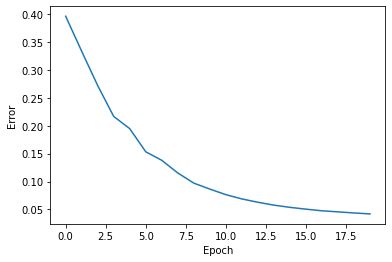

In [16]:
rbm_model.plot_error()

## H.

In [17]:
df_recom = rbm_model.recommender(inputUser,v0,w_t0,br_t0,ba_t0,W,br,ba)
df_recom

,movieId,title,genres,List Index,Recommendation Score
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,257,1.000000
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,277,1.000000
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,314,1.000000
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,510,0.999940
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1939,0.999605
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,224,0.784241
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,2226,0.534158
461,527,Schindler's List (1993),Drama|War,461,0.522985
97,110,Braveheart (1995),Action|Drama|War,97,0.520843
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,46,0.476773
